# 고객세그멘테이션(고객세분화)

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- id : 고윳값
- gender : 성별,
- income : 소득,
- spendig score : 쇼핑몰에서 부여한 고객의 점수 (소비금액 및 행동 패턴 기반)

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.shape

(200, 5)

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.cloumns=['id','gender','age','income','score']

<ipython-input-7-9514d8ee9cfd>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cloumns=['id','gender','age','income','score']


In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Clustering : Kmeans

In [9]:
from sklearn.cluster import KMeans

In [10]:
X = df[['income','score']].values

KeyError: "None of [Index(['income', 'score'], dtype='object')] are in the [columns]"

In [ ]:
X

In [11]:
model = KMeans(n_clusters=5, init='k-means++', random_state=1234)

In [12]:
cluster = model.fit_predict(X)

NameError: name 'X' is not defined

In [27]:
cluster

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [28]:
df['cluster'] = model.labels_

In [29]:
df.head()

,id,gender,age,income,score,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [30]:
df.groupby(['cluster'])['id'].count()

cluster
0    23
1    39
2    35
3    22
4    81
Name: id, dtype: int64

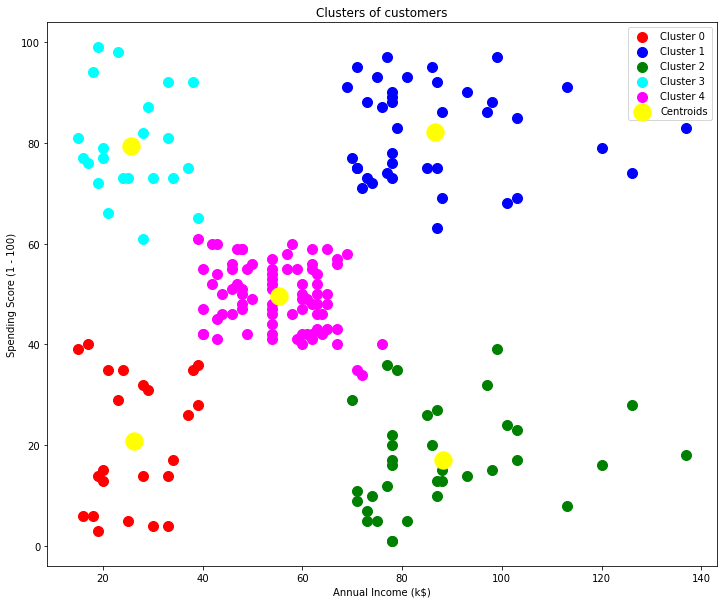

In [38]:
plt.figure(figsize=(12, 10))
plt.scatter(X[cluster == 0, 0], X[cluster == 0, 1], s= 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[cluster == 1, 0], X[cluster == 1, 1], s= 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[cluster == 2, 0], X[cluster == 2, 1], s= 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[cluster == 3, 0], X[cluster == 3, 1], s= 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[cluster == 4, 0], X[cluster == 4, 1], s= 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

# elbow method

C:\Users\ultra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


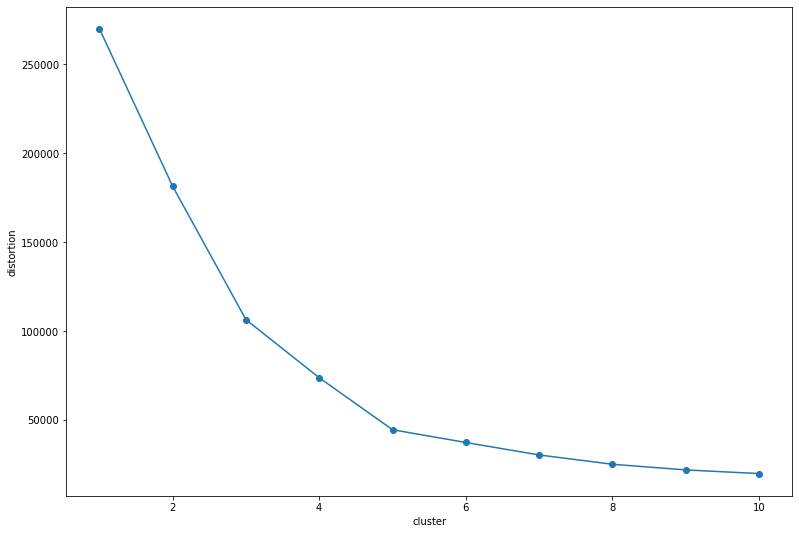

In [39]:
distortions = []
for i in range(1,11):
    km = KMeans(
    n_clusters=i, init='random',
    n_init=10, max_iter=50,
    tol=1e-04, random_state=1
    )
    km.fit(X)
    distortions.append(km.inertia_)

plt.figure(figsize=(13,9))
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('cluster')
plt.ylabel('distortion')
plt.show()

 - 원리 : 군집간 분산이 낮아져야 클러스터링이 잘된것, 전체 군집간 거리는 멀어질수록 좋음
 - 평가방법 : cost(distortions)가 내려가다가 주춤할때

In [40]:
plot_df = df.groupby(['cluster']).agg({'id':['count'],'age':['mean'],'income':['mean','max','min'],'score':['mean','max','min']})
plot_df.columns = ['_'.join(col) for col in plot_df.columns]
plot_df

,id_count,age_mean,income_mean,income_max,income_min,score_mean,score_max,score_min
cluster,,,,,,,,
0,23,45.217391,26.304348,39,15,20.913043,40,3
1,39,32.692308,86.538462,137,69,82.128205,97,63
2,35,41.114286,88.200000,137,70,17.114286,39,1
3,22,25.272727,25.727273,39,15,79.363636,99,61
4,81,42.716049,55.296296,76,39,49.518519,61,34


Text(0, 0.5, 'income')

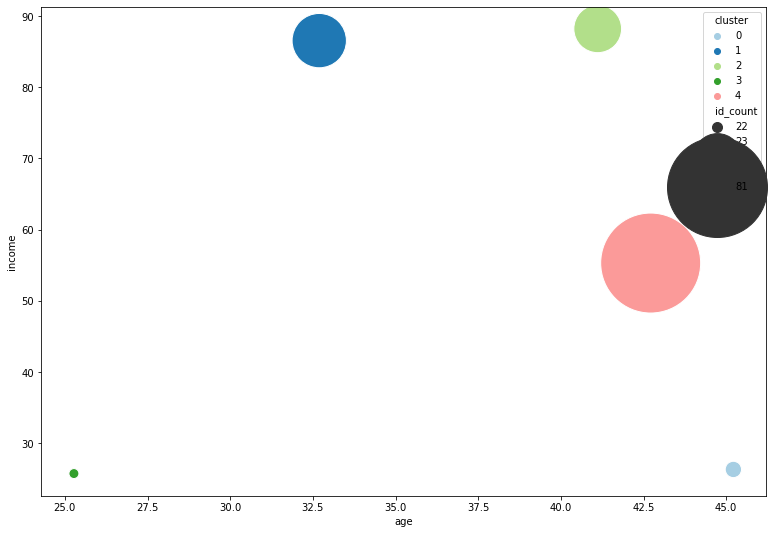

In [41]:
plt.figure(figsize=(13,9))
palette = sns.color_palette("Paired", len(df.cluster.unique()))

sns.scatterplot(data=plot_df, x='age_mean', y='income_mean', size='id_count',
                hue='cluster', palette=palette, sizes=(100,10000))
plt.xlabel('age')
plt.ylabel('income')

# silhouette

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

In [ ]:
def plotsil(X, y_km):
    cluster_labels = np.unique(y_km)
    sil_val = silhouette_samples(X, y_km, metric='euclidean')
    y_lower, y_upper = 0,0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_sil_val = sil_val(y_km == c)
        c_sil_val.sort()
        y_upper += len(c_sil_val)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_lower, y_upper), c_sil_val, height=1, edgecolor='none', color=color)
        yticks.append((y_lower + y_uuper)/2)
        y_lower += len(sil_val)
    
    sil_avg = np.mean(sil_val)
    
    plt.axline(sil_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)

In [ ]:
df2 = df.copy()
df2.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [ ]:
target_cols = ['Annual Income (k$)','Spending Score (1-100)']

In [ ]:
silhouette_score(df2[target_cols], df2['cluster'])

In [ ]:
# plotsil(df2[target_cols], df2['cluster'])

# Clustering : dbscan

In [ ]:
from sklearn.cluster import dbscan

In [ ]:
df3 = df.copy()
df3.drop(['CustomerID','Gender','cluster'], axis=1, inplace=True)

In [ ]:
labels = dbscan(df3, eps=0.01, min_samples=20, n_jobs=-1)

In [ ]:
labels

In [ ]:
df3['db_cluster'] = labels[1]

In [ ]:
df3['db_cluster'].value_counts()